In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import sys
import datacube

sys.path.append('../../../Scripts')
from deafrica_datahandling import load_ard
from deafrica_plotting import display_map
from deafrica_bandindices import calculate_indices

In [3]:
dc = datacube.Datacube(app="Vegetation_exercise")

In [4]:
# Define the area of interest
latitude = 0.02
longitude = 35.425
buffer = 0.1

# Combine central lat,lon with buffer to get area of interest
lat_range = (latitude-buffer, latitude+buffer)
lon_range = (longitude-buffer, longitude+buffer)

# Set the range of dates for the complete sample
time = ('2013-01-01', '2018-12-01')

# Set the date to separate the data into two samples for comparison
time_baseline = '2015-12-31'

In [5]:
display_map(x=lon_range, y=lat_range)

In [6]:
landsat_ds = load_ard(
    dc=dc, 
    products=["ls8_usgs_sr_scene"], 
    lat=lat_range, 
    lon=lon_range,
    time=time, 
    output_crs="EPSG:6933",
    resolution=(-30, 30),
    align=(15, 15),
    group_by='solar_day',
    measurements=['nir', 'red', 'blue'],
    min_gooddata=0.7)

Using pixel quality parameters for USGS Collection 1
Finding datasets
    ls8_usgs_sr_scene
Counting good quality pixels for each time step
Filtering to 46 out of 213 time steps with at least 70.0% good quality pixels
Applying pixel quality/cloud mask
Loading 46 time steps


In [8]:
landsat_ds = calculate_indices(landsat_ds, index='EVI', collection='c1')

In [9]:
baseline_sample = landsat_ds.EVI.sel(time=slice('2013-01-01', time_baseline))
postbaseline_sample = landsat_ds.EVI.sel(time=slice(time_baseline, '2018-12-01'))

In [10]:
baseline_composite = baseline_sample.mean('time')
postbaseline_composite = postbaseline_sample.mean('time')

In [11]:
diff_mean_composites = postbaseline_composite - baseline_composite

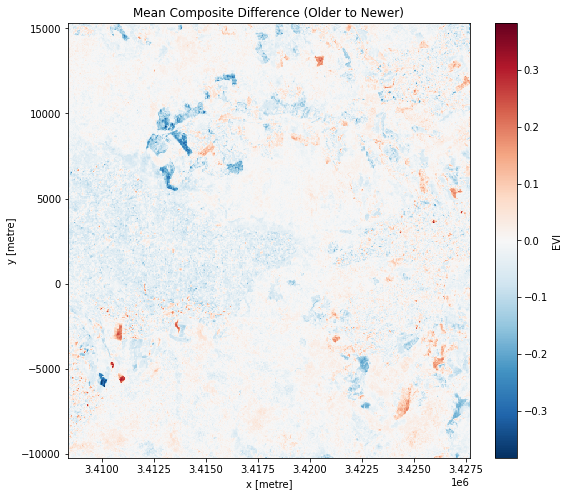

In [12]:
plt.figure(figsize=(9, 8))
diff_mean_composites.plot.imshow()
plt.title("Mean Composite Difference (Older to Newer)")
plt.show()

In [13]:
baseline_mean = baseline_sample.mean().values
postbaseline_mean = postbaseline_sample.mean().values

In [14]:
diff_total_mean = postbaseline_mean - baseline_mean
print(f"First half EVI: {baseline_mean}")
print(f"Second half EVI: {postbaseline_mean}")
print(f"EVI difference: {diff_total_mean}")
print(f"Percent EVI difference: {(diff_total_mean / baseline_mean):.2%}")

First half EVI: 0.45071932673454285
Second half EVI: 0.4408220648765564
EVI difference: -0.00989726185798645
Percent EVI difference: -2.20%
